# Gun detection model using Yolov10

# Step 1: Install and Import Libraries

In [2]:
pip install ultralytics 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 25.6 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
import os
import cv2
import glob
import yaml
import shutil
import random
from ultralytics import YOLO
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split



Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


#  Step 2: Load and Show 9 Images

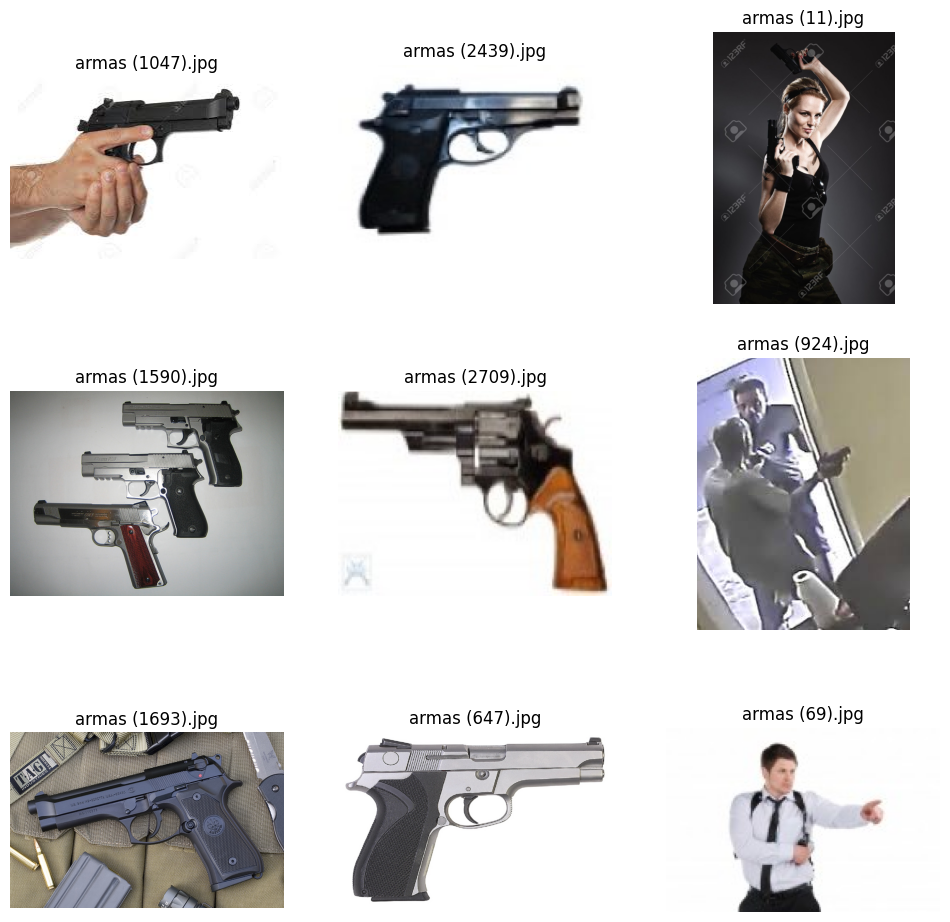

In [6]:
# Paths for the new dataset
images_folder_new = '/kaggle/input/labeled-guns-data-for-object-detection/data/images'  
labels_folder_new = '/kaggle/input/labeled-guns-data-for-object-detection/data/labels'  

# Display Sample Images from the New Dataset

def show_sample_images(images_folder, num_images=9):
    images = os.listdir(images_folder)[:num_images]  
    
    plt.figure(figsize=(12, 12))  # Set the figure size
    for i, img_file in enumerate(images):
        img_path = os.path.join(images_folder, img_file) 
        img = cv2.imread(img_path)  # Read the image
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
        
        plt.subplot(3, 3, i + 1)  # Create a subplot for each image
        plt.imshow(img)  # Display the image
        plt.title(img_file)  # Set the title as the image file name
        plt.axis('off')  # Hide axis ticks

    plt.show()

# Display the first 9 images from the new training dataset
show_sample_images(images_folder_new, num_images=9)


 Step 3: Split Data 

#  Step 3: Split Data 

In [7]:
image_dir = '/kaggle/input/labeled-guns-data-for-object-detection/data/images'
label_dir = '/kaggle/input/labeled-guns-data-for-object-detection/data/labels'

os.makedirs('/kaggle/working/images/train', exist_ok=True)
os.makedirs('/kaggle/working/images/val', exist_ok=True)
os.makedirs('/kaggle/working/labels/train', exist_ok=True)
os.makedirs('/kaggle/working/labels/val', exist_ok=True)

image_files = [f for f in os.listdir(image_dir) if f.endswith('.jpg')]

train_files, val_files = train_test_split(image_files, test_size=0.2, random_state=42)

for file in train_files:

    shutil.copy(os.path.join(image_dir, file), '/kaggle/working/images/train/')

    label_file = file.replace('.jpg', '.txt')
    shutil.copy(os.path.join(label_dir, label_file), '/kaggle/working/labels/train/')

    
for file in val_files:
  
    shutil.copy(os.path.join(image_dir, file), '/kaggle/working/images/val/')

    label_file = file.replace('.jpg', '.txt')
    shutil.copy(os.path.join(label_dir, label_file), '/kaggle/working/labels/val/')

print("Data has been split into train and val.")


Data has been split into train and val.


# Step 4: Create Data YAML File 

In [8]:
# Define the content of the YAML file
dataset_config = {
    'path': '/kaggle/working',  
    'names': {0: 'gun'}, 
    'train': 'images/train',  
    'val': 'images/val'  
}

with open('/kaggle/working/data.yaml', 'w') as file:
    yaml.dump(dataset_config, file, default_flow_style=False)

print("data.yaml file has been created.")


data.yaml file has been created.


# Step 5: Train YOLOv10 Model

In [9]:
import wandb

wandb.init(mode="dryrun")

wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.


In [10]:

model = YOLO('yolov10b.pt')

model.train(data='/kaggle/working/data.yaml', epochs=10, imgsz=640)


Ultralytics 8.3.233 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov10b.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, po

2025-11-30 05:20:37,578	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2025-11-30 05:20:38,466	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=1
WARNING ⚠️ no model scale passed. Assuming scale='b'.

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  3                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  4                  -1  4   1444864  ultralytics.nn.modules.block.C2f             [256, 256, 4, True]           
  5                  -1  1    137728  ultralytics.nn.modules.block.SCDown          [256, 512, 3, 2]              
  6                  -1  4   5773312  ultralytics.nn.modules.block.C2f             [512, 512, 4, True]       

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a8d3f78c8b0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

# Step 6: Make Predictions & Show 9 Images


0: 640x640 (no detections), 15.8ms
1: 640x640 1 gun, 15.8ms
2: 640x640 (no detections), 15.8ms
3: 640x640 1 gun, 15.8ms
4: 640x640 1 gun, 15.8ms
5: 640x640 1 gun, 15.8ms
6: 640x640 1 gun, 15.8ms
7: 640x640 2 guns, 15.8ms
8: 640x640 2 guns, 15.8ms
Speed: 2.1ms preprocess, 15.8ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)


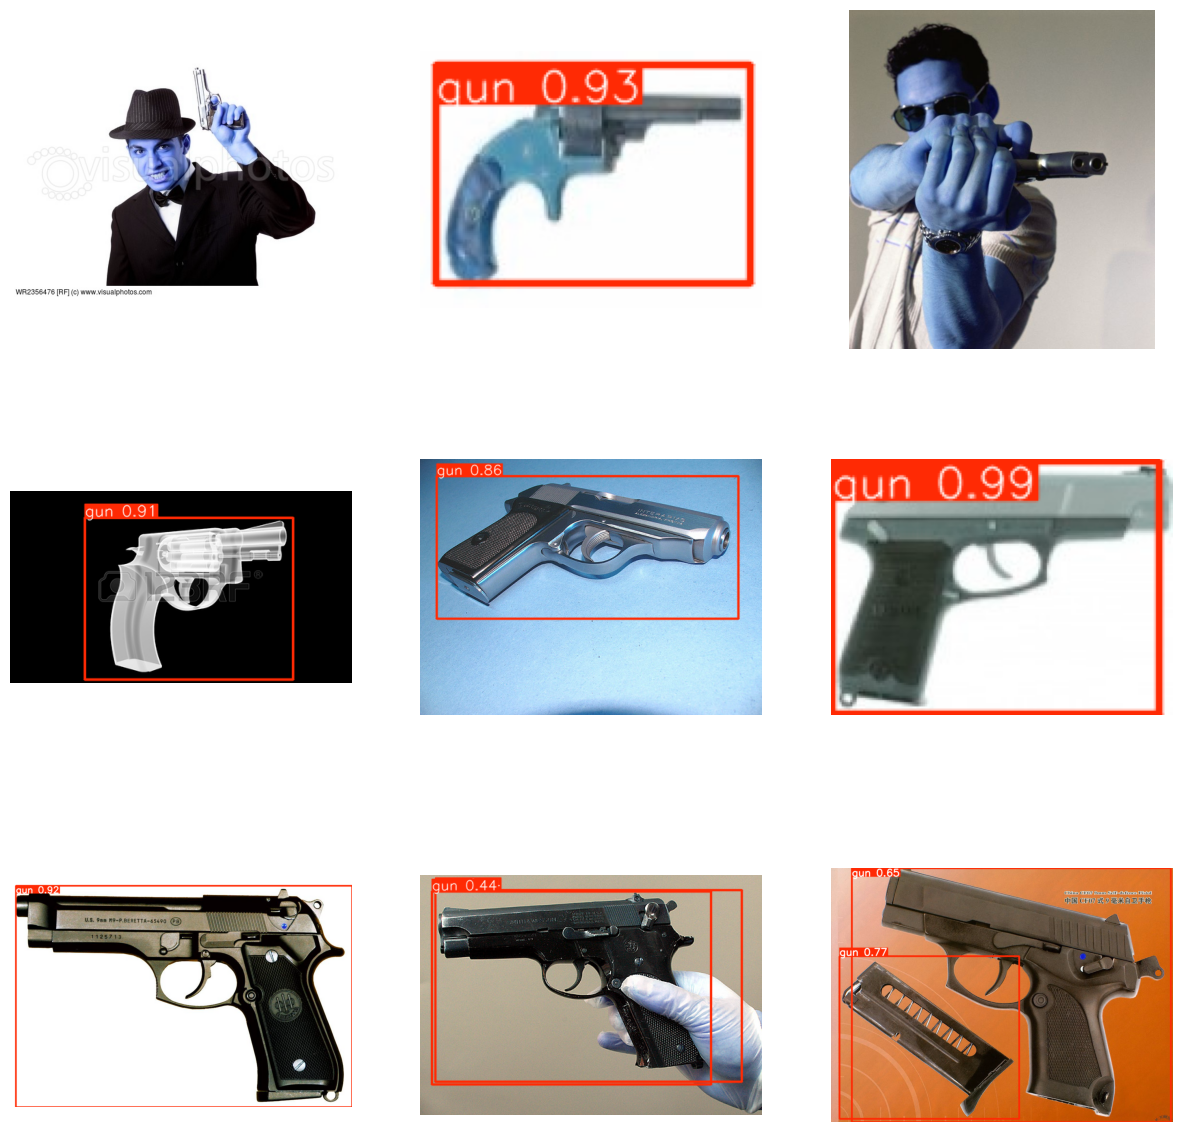

In [11]:
model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')

test_images_dir = '/kaggle/working/images/val'
test_images = glob.glob(test_images_dir + '/*.jpg')

random_images = random.sample(test_images, 9)

results = model(random_images, imgsz=640)

plt.figure(figsize=(15, 15))

for i, result in enumerate(results[:9]):
    
    img = cv2.imread(random_images[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
    
    annotated_img = result.plot()  
    
    plt.subplot(3, 3, i+1)
    plt.imshow(annotated_img)
    plt.axis('off')

plt.show()


# Step 7: Check on Videos 

In [ ]:
# ---- Load Your Trained Model ----
model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')
# OR: model = YOLO('Guns_detection_model.pt')

# ---- Input Video Path ----
input_video_path = "/kaggle/input/gun-video/gun_video.mp4"

# ---- Output Video Path ----
output_video_path = "/kaggle/working/gun_detected_video.mp4"

# ---- Read the video ----
cap = cv2.VideoCapture(input_video_path)

# Get video properties
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
fps = int(cap.get(cv2.CAP_PROP_FPS))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

print("FPS:", fps)
print("Width:", width)
print("Height:", height)
print("Video opened:", cap.isOpened())
# ---- Create video writer ----
out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

print("Processing video...")

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Run YOLO on frame
    results = model(frame, imgsz=640)

    # Draw boxes
    annotated_frame = results[0].plot()

    # Save frame to output
    out.write(annotated_frame)

cap.release()
out.release()




FPS: 30
Width: 1920
Height: 1080
Video opened: True
Processing video...

0: 384x640 (no detections), 43.8ms
Speed: 2.3ms preprocess, 43.8ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 15.5ms
Speed: 3.2ms preprocess, 15.5ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 15.2ms
Speed: 2.6ms preprocess, 15.2ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 15.2ms
Speed: 2.6ms preprocess, 15.2ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 15.2ms
Speed: 3.0ms preprocess, 15.2ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 15.2ms
Speed: 2.7ms preprocess, 15.2ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 15.0ms
Speed: 3.1ms preprocess, 15.0ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 64

In [ ]:
# ---- Load Your Trained Model ----
model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')
# OR: model = YOLO('Guns_detection_model.pt')

# ---- Input Video Path ----
input_video_path = "/kaggle/input/gun-dectection/videoplayback.mp4"

# ---- Output Video Path ----
output_video_path = "/kaggle/working/gun_detected_video1.mp4"

# ---- Read the video ----
cap = cv2.VideoCapture(input_video_path)

# Get video properties
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
fps = int(cap.get(cv2.CAP_PROP_FPS))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

print("FPS:", fps)
print("Width:", width)
print("Height:", height)
print("Video opened:", cap.isOpened())
# ---- Create video writer ----
out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

print("Processing video...")

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Run YOLO on frame
    results = model(frame, imgsz=640)

    # Draw boxes
    annotated_frame = results[0].plot()

    # Save frame to output
    out.write(annotated_frame)

cap.release()
out.release()




FPS: 59
Width: 1080
Height: 1920
Video opened: True
Processing video...

0: 640x384 2 guns, 43.0ms
Speed: 2.2ms preprocess, 43.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 2 guns, 15.2ms
Speed: 3.2ms preprocess, 15.2ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 2 guns, 15.2ms
Speed: 2.6ms preprocess, 15.2ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 2 guns, 15.3ms
Speed: 2.2ms preprocess, 15.3ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 gun, 15.3ms
Speed: 2.1ms preprocess, 15.3ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 gun, 15.3ms
Speed: 3.1ms preprocess, 15.3ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 gun, 15.3ms
Speed: 2.7ms preprocess, 15.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 gun, 15.2ms
Speed: 2.0ms preprocess, 15.2ms infer

# Step 7: Save Model

In [13]:
model.save('Guns_detection_model.pt')

In [1]:
import shutil
import os

# Create project folder
project_path = "/kaggle/working/VisionShield-GunDetect"
os.makedirs(project_path, exist_ok=True)

# 1. Copy notebook 
shutil.copy("/kaggle/working/Gun detection model using Yolov10 Code.ipynb", project_path)

# 2. Copy trained models
shutil.copy("/kaggle/working/Guns_detection_model.pt", project_path)
shutil.copy("/kaggle/working/yolov10b.pt", project_path)
shutil.copy("/kaggle/working/yolo11n.pt", project_path)

# 3. Copy outputs (videos)
shutil.copy("/kaggle/working/gun_detected_video.mp4", project_path)
shutil.copy("/kaggle/working/gun_detected_video1.mp4", project_path)

# 4. Copy dataset (images + labels)
shutil.copytree("/kaggle/working/images", os.path.join(project_path, "images"))
shutil.copytree("/kaggle/working/labels", os.path.join(project_path, "labels"))

# 5. Copy data.yaml
shutil.copy("/kaggle/working/data.yaml", project_path)

print("✅ All files copied to VisionShield-GunDetect folder")
shutil.make_archive("/kaggle/working/VisionShield-GunDetect", 'zip', "/kaggle/working/VisionShield-GunDetect")
print("✅ Project zipped: /kaggle/working/VisionShield-GunDetect.zip")


FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/working/notebook.ipynb'